In [1]:
import tensorflow as tf
# from keras import Dense
from tfkan import DenseKAN

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
seed_value = 0
import os, random
import numpy as np

os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=10, n_targets=1, noise=0.1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [4]:
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

l = DenseKAN(2, grid_size=20)
l.build(input_shape=(None, 10))

In [5]:
import numpy as np
x = x_train[4:500:50]
lst = l.get_spline_list()
print(lst[0][0](np.array([2, 1])))
print(sum([lst[i][0](x[0][i]) for i in range(10)]))

print(l(x))
# print(spline(x[0:1, 2:3], l.grid[0:1], l.spline_kernel[0:1, :, 0:1], l.spline_order))

<class 'numpy.ndarray'>


TypeError: ndarray() missing required argument 'shape' (pos 1)

In [23]:
# MLP
mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
mlp.build(input_shape=(None, 10))
mlp.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
%%time
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3), loss='mse', metrics=['mae'])
mlp_history = mlp.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test, y_test), verbose=0)

CPU times: total: 23.8 s
Wall time: 42.8 s


In [12]:
# KAN
kan = tf.keras.models.Sequential([
    DenseKAN(4, grid_size=12, grid_range=(-2.5, 2.5)),
    DenseKAN(1, grid_size=12, grid_range=(-2.5, 2.5))
])

kan.build(input_shape=(None, 10))
kan.summary()
lst = kan.layers[0].get_spline_list()
lst[0][0].t

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_kan_3 (DenseKAN)          │ (None, 4)              │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_kan_4 (DenseKAN)          │ (None, 1)              │            40 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440 (1.72 KB)

 Trainable params: 440 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

<tf.Tensor: shape=(1, 12), dtype=float32, numpy=
array([[-2.5       , -2.0454545 , -1.590909  , -1.1363636 , -0.6818181 ,
        -0.22727275,  0.22727275,  0.68181825,  1.1363637 ,  1.590909  ,
         2.0454545 ,  2.5       ]], dtype=float32)>

In [38]:
%%time
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3), loss='mse', metrics=['mae'])
kan_history = kan.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test, y_test), verbose=0)



CPU times: total: 31.5 s
Wall time: 53 s


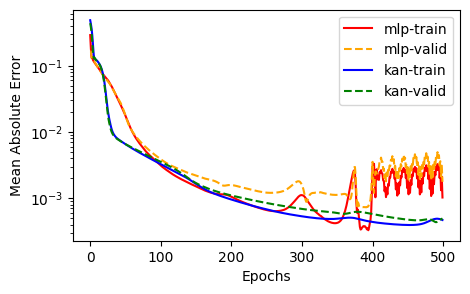

In [40]:
# plot history
fig = plt.figure(figsize=(5,3))
plt.semilogy(mlp_history.history['mae'], label='mlp-train', ls="-", color='red')
plt.semilogy(mlp_history.history['val_mae'], label='mlp-valid', ls="--", color='orange')
plt.semilogy(kan_history.history['mae'], label='kan-train', ls="-", color='blue')
plt.semilogy(kan_history.history['val_mae'], label='kan-valid', ls="--", color='green')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()